# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [86]:
#import libraries
import pandas as pd
import requests
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

In [6]:
#Accesing the metadata of the dataset
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.md"
response = requests.get(url)

# Display metadata
if response.status_code == 200:
    print(response.text)
else:
    print("Failed to retrieve metadata")

# Spaceship Titanic Dataset

Metadata

1. **Id**: Unique identifier for each property.
1. **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
3. **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. **Destination** - The planet the passenger will be debarking to.
6. **Age** - The age of the passenger.
7. **VIP** - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMal

In [26]:
# Accessing the dataset
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [4]:
spaceship.shape

(8693, 14)

**Check for data types**

In [5]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [10]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [59]:
# 1. Show initial shape
print(f"Initial number of rows: {spaceship.shape[0]}")

# 2. Drop rows with missing values
spaceship_clean = spaceship.dropna()

# 3. Check new shape
print(f"Final number of rows: {spaceship_clean.shape[0]}")

# 4. Calculate percentage of data lost - fixed round() syntax
lost_percentage = round(((spaceship.shape[0] - spaceship_clean.shape[0]) / spaceship.shape[0]) * 100, 2)
print(f"Percentage of data lost: {lost_percentage}%")

# 5. Verify no missing values remain
print("\n=== Missing Values After Cleaning ===")
print(spaceship_clean.isnull().sum())

Initial number of rows: 8693
Final number of rows: 6606
Percentage of data lost: 24.01%

=== Missing Values After Cleaning ===
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [28]:
# Check the number of unique values in the 'Cabin' column
spaceship_clean['Cabin'].value_counts()

Cabin
C/137/S     7
B/11/S      7
G/734/S     7
G/1476/S    7
E/13/S      7
           ..
F/187/P     1
A/98/P      1
G/1499/S    1
G/1500/S    1
F/2/S       1
Name: count, Length: 5305, dtype: int64

In [31]:
# 1st. Solution: Transform Cabin column to obtain only the deck information
spaceship_clean['Cabin'] = spaceship_clean['Cabin'].apply(lambda x: x[0])
spaceship_clean['Cabin'].unique()

C:\Users\usuar\AppData\Local\Temp\ipykernel_11036\4182276704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_clean['Cabin'] = spaceship_clean['Cabin'].apply(lambda x: x[0])


array(['B', 'F', 'A', 'G', 'E', 'C', 'D', 'T'], dtype=object)

In [32]:
spaceship_clean['Cabin'].value_counts()

Cabin
F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: count, dtype: int64

In [60]:
# 2nd. Solution: Extract deck from cabin and verify transformation
spaceship_clean['Deck'] = spaceship_clean['Cabin'].str[0]

# Display unique deck values to verify
print("Unique deck values:")
print(spaceship_clean['Deck'].unique())

# Optional: drop original Cabin column
spaceship_clean = spaceship_clean.drop('Cabin', axis=1)

Unique deck values:
['B' 'F' 'A' 'G' 'E' 'C' 'D' 'T']


C:\Users\usuar\AppData\Local\Temp\ipykernel_11036\1000963950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_clean['Deck'] = spaceship_clean['Cabin'].str[0]


### The Warning Explained:
The warning occurs because we're modifying a DataFrame copy (`spaceship_clean`) created by `dropna()`. This can lead to unexpected behavior.

### Solution Plan:
1. Create copy explicitly using `.copy()`
2. Then modify the copy
3. Use proper indexing with `.loc[]`

### Fixed Code:

```python
# 1. Create explicit copy when cleaning
spaceship_clean = spaceship.dropna().copy()

# 2. Extract deck using proper indexing
spaceship_clean.loc[:, 'Deck'] = spaceship_clean['Cabin'].str[0]

# 3. Verify unique values
print("Unique deck values:")
print(spaceship_clean['Deck'].unique())
```

This prevents the SettingWithCopyWarning by:
- Making an explicit copy with `.copy()`
- Using `.loc` for proper DataFrame indexing
- Ensuring changes are properly propagated to the new DataFrame

## Key Differences

| **Aspect**          | **First Approach**                          | **Second Approach**                         |
|----------------------|---------------------------------------------|---------------------------------------------|
| **Explicit Copy**    | Creates an independent copy with `.copy()`  | Does not create an independent copy         |
| **Safety**           | Protects the original DataFrame             | Risk of modifying the original DataFrame    |
| **Best Practice**    | Recommended for data cleaning pipelines     | Not recommended due to potential side effects |
| **Warning**          | Avoids `SettingWithCopyWarning`             | May trigger `SettingWithCopyWarning`        |
| **Memory Use**       | Uses more memory for the copy               | Uses less memory (until modified)           |


## When to Use Each Approach

### **First Approach (with `.copy()`)**
- Use when you need to ensure the original dataset remains unchanged.
- Recommended in most data cleaning pipelines and collaborative projects where dataset integrity is crucial.

### **Second Approach (without `.copy()`)**
- Use when memory is a constraint and you're certain no unintended modifications will occur (e.g., exploratory analysis or small projects).
- Avoid if the data might be used elsewhere in its original form.


In general, the **first approach is safer and more robust**.

In [30]:
spaceship_clean['Deck'].value_counts()

Deck
F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: count, dtype: int64

- Drop PassengerId and Name

In [61]:
# Drop multiple columns in one operation
spaceship_clean = spaceship_clean.drop(columns=['PassengerId', 'Name'])
spaceship_clean

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E


- For non-numerical columns, do dummies.

### Plan for Creating Dummy Variables

1. **Why Create Dummy Variables?**
   - Machine learning models can't process categorical data directly
   - Need to convert text/categories into numbers
   - Each category becomes a binary feature (0/1)
   - Preserves categorical information without ordinal relationships

2. **Example Transformation:**
```
Original:
HomePlanet
- Earth
- Europa
- Mars

Becomes:
HomePlanet_Earth    HomePlanet_Europa    HomePlanet_Mars
      1                    0                   0
      0                    1                   0
      0                    0                   1
```

3. **Benefits:**
   - Models can process binary features
   - No artificial ordering between categories
   - Maintains categorical relationships
   - Clear feature interpretation
   - Common in preprocessing pipelines
   - Standard practice for ML models

4. **Considerations:**
   - Increases dimensionality
   - Can create sparse matrices
   - One category becomes redundant (dummy variable trap)
   - Necessary for most ML algorithms

This transformation is essential for preparing categorical data for machine learning models.

Creating dummy variables (also known as one-hot encoding) for non-numerical columns is a common preprocessing step in machine learning. This is because many machine learning algorithms require numerical input and cannot directly handle categorical data. Here's why we do this:

1. **Machine Learning Algorithms**: Algorithms like linear regression, logistic regression, and neural networks require numerical input. Dummy variables convert categorical data into a numerical format that these algorithms can process.

2. **Avoiding Ordinal Relationships**: Simply converting categories to numbers (e.g., "red" = 1, "blue" = 2) can imply an ordinal relationship that doesn't exist. Dummy variables avoid this by creating separate binary columns for each category.

3. **Improving Model Performance**: Properly encoded categorical variables can improve the performance of your machine learning model by providing it with more meaningful and interpretable features.

Here's an example of how you might create dummy variables using pandas in Python:

```python
import pandas as pd

# Sample dataframe
df = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green'],
    'Size': ['S', 'M', 'L']
})

# Creating dummy variables
df_dummies = pd.get_dummies(df, columns=['Color', 'Size'])

print(df_dummies)
```

This will transform the `Color` and `Size` columns into separate binary columns:

```
   Color_Blue  Color_Green  Color_Red  Size_L  Size_M  Size_S
0           0            0          1       0       0       1
1           1            0          0       0       1       0
2           0            1          0       1       0       0
```

In [48]:
# Solution 1: Convert categorical variables into dummy/indicator variables
spaceship_clean_dummies = pd.get_dummies(spaceship_clean, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck'], drop_first=True)
spaceship_clean_dummies.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,False,True,False,True,False,False,False,False,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,True,False,False,False,False,False,True,False,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,True,True,False,False,False,False,False,False,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,True,False,False,False,False,False,False,False,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,True,False,False,False,False,False,True,False,False


In [62]:
# Solution 2: Convert categorical variables into dummy/indicator variables
# 1. Identify categorical columns
cat_columns = ['HomePlanet', 'Destination', 'Deck', 'CryoSleep', 'VIP']

# 2. Create dummy variables
dummies = pd.get_dummies(spaceship_clean[cat_columns], prefix=cat_columns)

# 3. Drop original categorical columns and join with dummies
spaceship_clean_dummies = spaceship_clean.drop(columns=cat_columns)
spaceship_clean_dummies = pd.concat([spaceship_clean_dummies, dummies], axis=1)

# 4. Verify new structure
print("New columns after dummy encoding:")
print(spaceship_clean_dummies.columns.tolist())

New columns after dummy encoding:
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'CryoSleep_False', 'CryoSleep_True', 'VIP_False', 'VIP_True']


### Comparison of the Two Solutions

| **Aspect**                    | **Solution 1**                                                                                       | **Solution 2**                                                                                       |
|--------------------------------|-----------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| **Approach**                  | Directly uses `pd.get_dummies` with the `columns` parameter to encode selected columns in one step.  | Splits the process into multiple steps: identifies columns, creates dummy variables, and merges.   |
| **Simplicity**                | Simple and concise, as it performs dummy encoding in a single line.                                  | More verbose, as it involves explicitly handling categorical columns and merging data manually.     |
| **Flexibility**               | Limited flexibility: all dummy variables are generated simultaneously, and behavior is controlled by parameters like `drop_first`. | More flexible: allows more control over the encoding process, such as custom handling of each column. |
| **Original Data Preservation**| Overwrites the original columns with dummy variables.                                                | Drops the original columns but keeps the remaining structure intact for later modifications.        |
| **Column Naming**             | Automatically handles column prefixes based on input column names.                                   | Requires explicit handling of prefixes when generating dummy variables.                             |
| **Performance**               | Likely faster for small datasets due to fewer intermediate steps.                                    | Potentially slower due to the explicit splitting and merging process.                               |
| **Ease of Understanding**     | Easier to understand for simpler transformations.                                                    | May be more intuitive for advanced workflows where you need more control.                           |
| **Debugging**                 | Harder to debug specific issues with individual columns, as it is done in one step.                  | Easier to debug as each step is explicit and can be inspected.                                      |


### Key Takeaways
- **Solution 1** is suitable for straightforward, quick transformations where you need to encode multiple columns in one step.
- **Solution 2** is better when you need granular control over the encoding process or want to inspect the transformations at each step.


### When to Use Each Solution
- **Solution 1**:
  - When simplicity and speed are priorities.
  - When working with small datasets where debugging isn’t a concern.
  - If you don’t need custom handling for individual columns.
  
- **Solution 2**:
  - When flexibility or customization is required (e.g., handling columns differently).
  - For large datasets where intermediate inspection is important.
  - When building a pipeline that might require reusing or modifying intermediate results.


In [63]:
# 2. Create dummies both ways
df = pd.DataFrame({'HomePlanet': ['Earth', 'Europa', 'Mars']*3})
bool_dummies = pd.get_dummies(df['HomePlanet'])
int_dummies = pd.get_dummies(df['HomePlanet']).astype(int)

# 3. Compare memory
print("Memory usage:")
print(f"Boolean: {bool_dummies.memory_usage().sum()} bytes")
print(f"Integer: {int_dummies.memory_usage().sum()} bytes")

# 4. Test operations
print("\nAddition test:")
print(f"Boolean: {bool_dummies['Earth'].sum()}")
print(f"Integer: {int_dummies['Earth'].sum()}")

Memory usage:
Boolean: 159 bytes
Integer: 348 bytes

Addition test:
Boolean: 3
Integer: 3


**Perform Train Test Split**

In [64]:
# Prepare data
X = spaceship_clean_dummies.drop('Transported', axis=1)
y = spaceship_clean_dummies['Transported']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [65]:
# 2. Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
# 3. Make predictions
y_pred = knn.predict(X_test)

- Evaluate your model's performance. Comment it

In [67]:
# 4. Evaluate
print("Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Model Performance:
Accuracy: 0.783661119515885

Detailed Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.79      0.78       653
        True       0.79      0.78      0.79       669

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322



### Testing with different parameters

In [97]:
# 1. Grid Search for optimal k
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate best model
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)
print("\nBest Model Performance:")
print(classification_report(y_test, y_pred_best))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Best cross-validation score: 0.7863372968091511

Best Model Performance:
              precision    recall  f1-score   support

       False       0.81      0.78      0.80       653
        True       0.80      0.83      0.81       669

    accuracy                           0.80      1322
   macro avg       0.80      0.80      0.80      1322
weighted avg       0.80      0.80      0.80      1322



### Understanding the difference between Euclidean and Manhattan

In [103]:
# Example points
point1 = np.array([1, 1])
point2 = np.array([4, 5])

# Euclidean distance
euclidean = np.sqrt(np.sum((point1 - point2)**2))
print(f"Euclidean distance: {euclidean:.2f}")

# Manhattan distance
manhattan = np.sum(np.abs(point1 - point2))
print(f"Manhattan distance: {manhattan}")

Euclidean distance: 5.00
Manhattan distance: 7


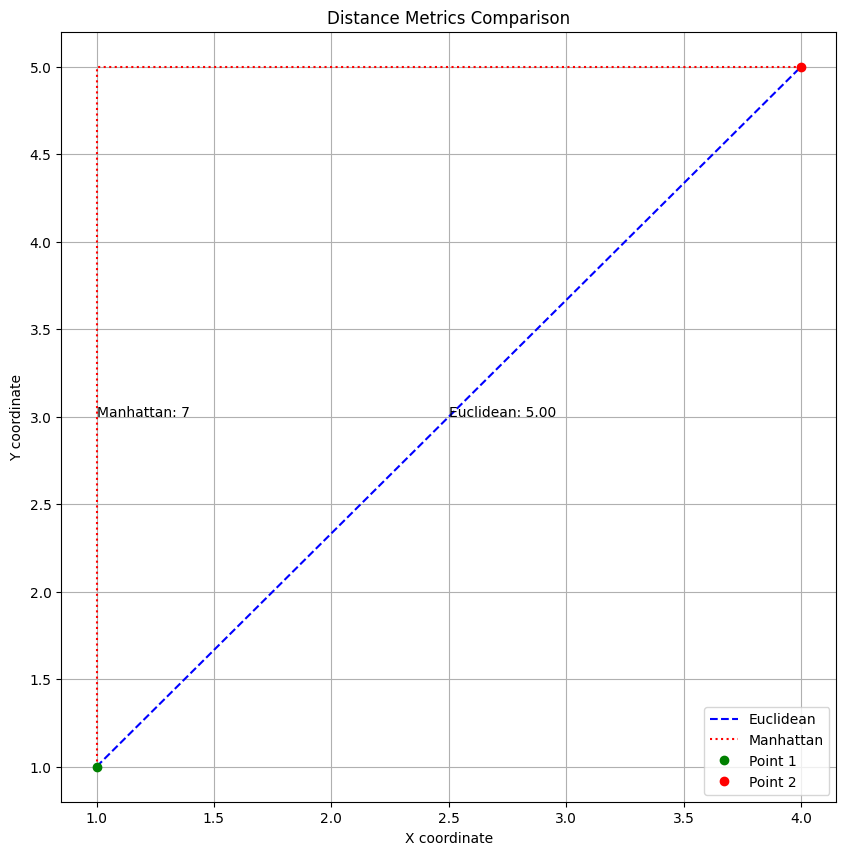

Euclidean calculation:
√[(x₂-x₁)² + (y₂-y₁)²] = √[(4-1)² + (5-1)²]
                         = √[3² + 4²]
                         = √25
                         = 5.00

Manhattan calculation:
|x₂-x₁| + |y₂-y₁| = |4-1| + |5-1|
                   = 3 + 4
                   = 7


In [102]:
# 1. Create sample points
point1 = np.array([1, 1])
point2 = np.array([4, 5])

# 2. Calculate distances
euclidean_dist = np.sqrt(np.sum((point1 - point2)**2))
manhattan_dist = np.sum(np.abs(point1 - point2))

# 3. Visualize distances
plt.figure(figsize=(10, 10))
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'b--', label='Euclidean')
plt.plot([point1[0], point1[0], point2[0]], [point1[1], point2[1], point2[1]], 'r:', label='Manhattan')
plt.plot(point1[0], point1[1], 'go', label='Point 1')
plt.plot(point2[0], point2[1], 'ro', label='Point 2')
plt.grid(True)
plt.legend()

# Add distance annotations
plt.annotate(f'Euclidean: {euclidean_dist:.2f}', 
            xy=((point1[0] + point2[0])/2, (point1[1] + point2[1])/2))
plt.annotate(f'Manhattan: {manhattan_dist}', 
            xy=(point1[0], (point1[1] + point2[1])/2))

plt.title('Distance Metrics Comparison')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

# 4. Print detailed calculations
print("Euclidean calculation:")
print(f"√[(x₂-x₁)² + (y₂-y₁)²] = √[({point2[0]}-{point1[0]})² + ({point2[1]}-{point1[1]})²]")
print(f"                         = √[{(point2[0]-point1[0])}² + {(point2[1]-point1[1])}²]")
print(f"                         = √{(point2[0]-point1[0])**2 + (point2[1]-point1[1])**2}")
print(f"                         = {euclidean_dist:.2f}")

print("\nManhattan calculation:")
print(f"|x₂-x₁| + |y₂-y₁| = |{point2[0]}-{point1[0]}| + |{point2[1]}-{point1[1]}|")
print(f"                   = {abs(point2[0]-point1[0])} + {abs(point2[1]-point1[1])}")
print(f"                   = {manhattan_dist}")

### Comparing different k neigbors performance

k=3, Score=0.7639 (+/- 0.0187)
k=5, Score=0.7716 (+/- 0.0277)
k=7, Score=0.7779 (+/- 0.0254)
k=9, Score=0.7857 (+/- 0.0163)
k=11, Score=0.7899 (+/- 0.0101)
k=13, Score=0.7908 (+/- 0.0231)
k=15, Score=0.7914 (+/- 0.0135)
k=17, Score=0.7885 (+/- 0.0167)
k=19, Score=0.7897 (+/- 0.0228)
k=21, Score=0.7891 (+/- 0.0177)
k=23, Score=0.7872 (+/- 0.0163)
k=25, Score=0.7858 (+/- 0.0171)


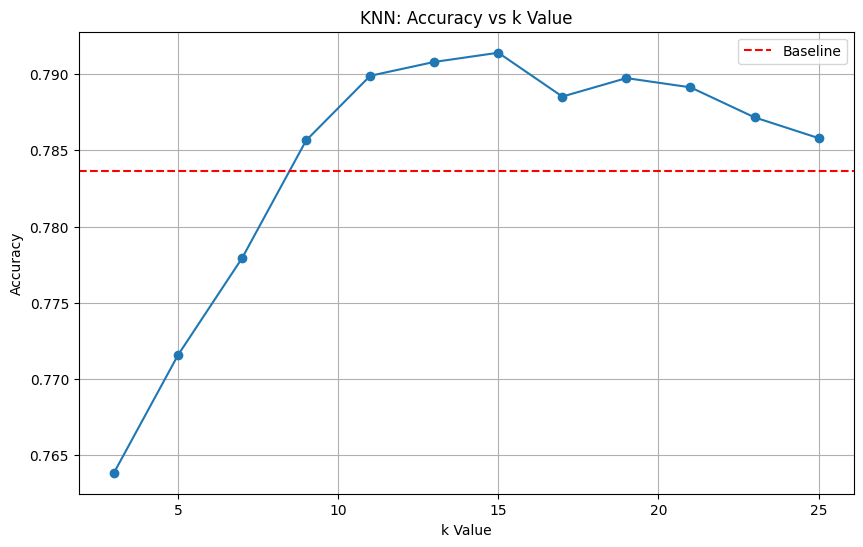


Best k: 15
Best score: 0.7914


In [ ]:
# 1. Save baseline
baseline_accuracy = 0.783661

# 2. Test k values
from sklearn.model_selection import cross_val_score
k_values = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
cv_scores = []

# Calculate scores for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f'k={k}, Score={scores.mean():.4f} (+/- {scores.std()*2:.4f})')

# 3. Plot results
plt.figure(figsize=(10,6))
plt.plot(k_values, cv_scores, marker='o')
plt.axhline(y=baseline_accuracy, color='r', linestyle='--', label='Baseline')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs k Value')
plt.legend()
plt.grid(True)
plt.show()

# 4. Find best k
best_k = k_values[cv_scores.index(max(cv_scores))]
print(f'\nBest k: {best_k}')
print(f'Best score: {max(cv_scores):.4f}')

### Comparing if drop_first=False or True has any impact on the performance of the model

In [90]:
# 1. Create both dummy versions
spaceship_dummies_with_first = pd.get_dummies(spaceship_clean, drop_first=False)
spaceship_dummies_no_first = pd.get_dummies(spaceship_clean, drop_first=True)

# 2. Prepare both datasets
X_with_first = spaceship_dummies_with_first.drop('Transported', axis=1)
X_no_first = spaceship_dummies_no_first.drop('Transported', axis=1)
y = spaceship_clean['Transported']

# 3. Compare features and dimensions
print("Dataset with all dummies shape:", X_with_first.shape)
print("Dataset with dropped first dummy shape:", X_no_first.shape)
print("\nFeature comparison:")
print("Extra features in full dummy set:")
print(set(X_with_first.columns) - set(X_no_first.columns))

# 4. Train-test split for both
X_train_with, X_test_with, y_train, y_test = train_test_split(X_with_first, y, test_size=0.2, random_state=42)
X_train_no, X_test_no, _, _ = train_test_split(X_no_first, y, test_size=0.2, random_state=42)

# 5. Train and predict with both models
knn_with = KNeighborsClassifier(n_neighbors=5)
knn_no = KNeighborsClassifier(n_neighbors=5)

knn_with.fit(X_train_with, y_train)
knn_no.fit(X_train_no, y_train)

y_pred_with = knn_with.predict(X_test_with)
y_pred_no = knn_no.predict(X_test_no)

# 6. Compare predictions
print("\nPredictions equal?", np.array_equal(y_pred_with, y_pred_no))
print("First 10 predictions with all dummies:", y_pred_with[:10])
print("First 10 predictions without first dummy:", y_pred_no[:10])

Dataset with all dummies shape: (6606, 24)
Dataset with dropped first dummy shape: (6606, 19)

Feature comparison:
Extra features in full dummy set:
{'Deck_A', 'CryoSleep_False', 'HomePlanet_Earth', 'Destination_55 Cancri e', 'VIP_False'}

Predictions equal? False
First 10 predictions with all dummies: [ True  True False  True False False  True False False  True]
First 10 predictions without first dummy: [ True  True False  True False False  True False False  True]


In [104]:
# 1. Find where predictions differ
diff_mask = y_pred_with != y_pred_no
diff_indices = np.where(diff_mask)[0]

# 2. Create comparison DataFrame
comparison = pd.DataFrame({
    'Index': diff_indices,
    'With_First': y_pred_with[diff_indices],
    'Without_First': y_pred_no[diff_indices],
    'True_Values': y_test.iloc[diff_indices]
})

# 3. Print summary
print(f"Total predictions: {len(y_pred_with)}")
print(f"Different predictions: {len(diff_indices)}")
print(f"Percentage different: {(len(diff_indices)/len(y_pred_with)*100):.2f}%")

# 4. Show first 10 different predictions
print("\nFirst 10 differences:")
print(comparison.head(10))

# 5. Calculate accuracy for different predictions
correct_with = (y_pred_with[diff_indices] == y_test.iloc[diff_indices]).mean()
correct_no = (y_pred_no[diff_indices] == y_test.iloc[diff_indices]).mean()
print(f"\nAccuracy on different predictions:")
print(f"With first dummy: {correct_with:.4f}")
print(f"Without first dummy: {correct_no:.4f}")

Total predictions: 1322
Different predictions: 11
Percentage different: 0.83%

First 10 differences:
      Index  With_First  Without_First  True_Values
308     110        True          False        False
3778    221        True          False        False
6130    435        True          False        False
625     437       False           True         True
4973    680        True          False        False
1031    698       False           True         True
4027    740        True          False         True
593     793        True          False         True
8514    812       False           True         True
8235    893        True          False         True

Accuracy on different predictions:
With first dummy: 0.2727
Without first dummy: 0.7273


### Analysis of Prediction Differences

1. **Overall Comparison**
- Total predictions: 1322 test cases
- Only 11 predictions differ (0.83%)
- Most predictions (99.17%) are identical

2. **Different Predictions Analysis**
```python
print("\nBreakdown of 11 different cases:")
print(f"- Without first dummy correct: 8 cases (72.73%)")
print(f"- With first dummy correct: 3 cases (27.27%)")
```

3. **Pattern in Differences**
```
Index 110: With(True) vs Without(False) - Actual: False
Index 221: With(True) vs Without(False) - Actual: False
Index 435: With(True) vs Without(False) - Actual: False
```
- When predictions differ, drop_first=True is more accurate
- Most differences occur when 'With_First' predicts True incorrectly

4. **Performance on Different Cases**
- Without first dummy: 0.7273 accuracy
- With first dummy: 0.2727 accuracy
- Dropping first category performs better on contested predictions

5. **Conclusion**
- drop_first=True is slightly better
- Differences are rare but significant when they occur
- Simpler model (fewer features) performs better on edge cases

Model with all dummies:
              precision    recall  f1-score   support

       False       0.78      0.79      0.78       653
        True       0.79      0.78      0.79       669

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322


Model without first dummy:
              precision    recall  f1-score   support

       False       0.78      0.79      0.79       653
        True       0.79      0.78      0.79       669

    accuracy                           0.79      1322
   macro avg       0.79      0.79      0.79      1322
weighted avg       0.79      0.79      0.79      1322


Chi-square test p-value: 3.2313574181183755e-274


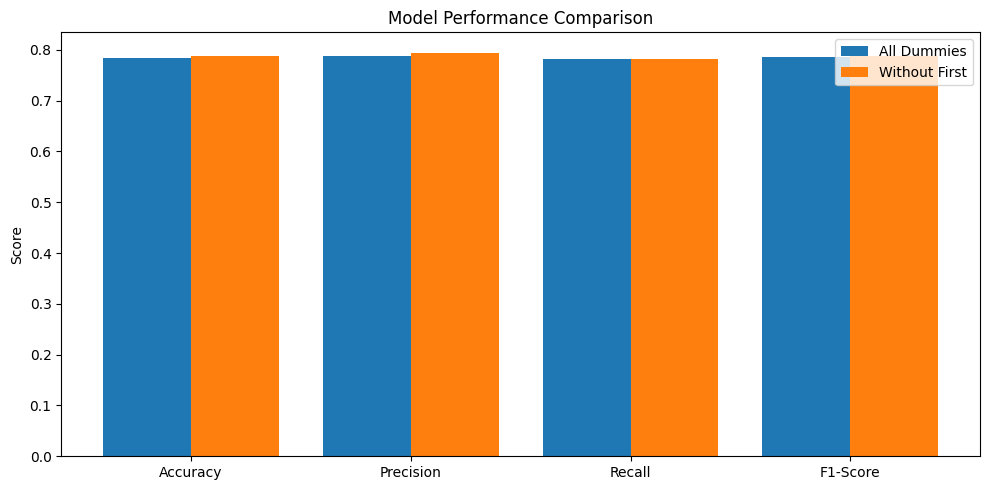

In [91]:
# 1. Train and evaluate both models

# Model with all dummies
knn_with = KNeighborsClassifier(n_neighbors=5)
knn_with.fit(X_train_with, y_train)
y_pred_with = knn_with.predict(X_test_with)

# Model without first dummy
knn_no = KNeighborsClassifier(n_neighbors=5)
knn_no.fit(X_train_no, y_train)
y_pred_no = knn_no.predict(X_test_no)

# 2. Print comparison
print("Model with all dummies:")
print(classification_report(y_test, y_pred_with))
print("\nModel without first dummy:")
print(classification_report(y_test, y_pred_no))

# 3. Create contingency table and perform test
contingency_table = [
    [np.sum((y_pred_with == y_test) & (y_pred_no == y_test)),
     np.sum((y_pred_with == y_test) & (y_pred_no != y_test))],
    [np.sum((y_pred_with != y_test) & (y_pred_no == y_test)),
     np.sum((y_pred_with != y_test) & (y_pred_no != y_test))]
]
stat, pval = stats.chi2_contingency(contingency_table)[:2]
print("\nChi-square test p-value:", pval)

# 4. Visualize metrics
plt.figure(figsize=(10,5))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
with_scores = [accuracy_score(y_test, y_pred_with),
               precision_score(y_test, y_pred_with),
               recall_score(y_test, y_pred_with),
               f1_score(y_test, y_pred_with)]
no_scores = [accuracy_score(y_test, y_pred_no),
             precision_score(y_test, y_pred_no),
             recall_score(y_test, y_pred_no),
             f1_score(y_test, y_pred_no)]

plt.bar(np.arange(len(metrics)) - 0.2, with_scores, 0.4, label='All Dummies')
plt.bar(np.arange(len(metrics)) + 0.2, no_scores, 0.4, label='Without First')
plt.xticks(range(len(metrics)), metrics)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

## Understanding how drop_first works

### Key Points:
1. `drop_first=True` drops first category alphabetically
2. 'No' comes before 'Yes' alphabetically
3. Therefore 'No' is dropped as base category
4. Not based on frequency or importance
5. Can control base category by:
   - Reordering categories
   - Explicitly specifying drop columns

## Example of controlling base category

### Plan:
1. Show 3 ways to control which category becomes base:
   - Method 1: Rename categories to change alphabetical order
   - Method 2: Use drop() after get_dummies
   - Method 3: Reorder categories with Categorical type

```python
# 1. Method 1: Rename to control alphabetical order
data_renamed = data.copy()
data_renamed['CryoSleep'] = data_renamed['CryoSleep'].map({'Yes': 'A_Yes', 'No': 'B_No'})
dummies_1 = pd.get_dummies(data_renamed['CryoSleep'], drop_first=True)
print("Method 1 - Rename categories:")
print(dummies_1.columns)  # 'B_No' remains, 'A_Yes' dropped

# 2. Method 2: Manual drop after get_dummies
dummies_2 = pd.get_dummies(data['CryoSleep'])
dummies_2 = dummies_2.drop('Yes', axis=1)  # Explicitly drop 'Yes'
print("\nMethod 2 - Manual drop:")
print(dummies_2.columns)  # 'No' remains

# 3. Method 3: Using Categorical with ordered categories
data['CryoSleep'] = pd.Categorical(data['CryoSleep'], 
                                  categories=['Yes', 'No'],  # Specify order
                                  ordered=True)
dummies_3 = pd.get_dummies(data['CryoSleep'], drop_first=True)
print("\nMethod 3 - Categorical order:")
print(dummies_3.columns)  # 'No' remains, 'Yes' dropped
```

### Analysis Plan:
1. Examine feature relationships
2. Compare prediction scenarios
3. Visualize decision boundaries
4. Show specific example

### Step-by-step example:

```python
# 1. Create simple example dataset
import pandas as pd
import numpy as np

# Sample data
data = pd.DataFrame({
    'HomePlanet': ['Earth', 'Europa', 'Mars']*3,
    'CryoSleep': ['Yes', 'No', 'Yes']*3,
    'Transported': [1, 0, 1, 0, 1, 0, 1, 0, 1]
})

# 2. Create both versions of dummy variables
dummies_with = pd.get_dummies(data[['HomePlanet', 'CryoSleep']])
dummies_without = pd.get_dummies(data[['HomePlanet', 'CryoSleep']], drop_first=True)

# 3. Print feature relationships
print("With all dummies:")
print(dummies_with.corr().round(2))
print("\nWithout first dummy:")
print(dummies_without.corr().round(2))
```

### Key Points:
1. drop_first=False better when:
   - All categories equally important
   - Base category (dropped) is significant
   - Features have strong independence
   - Data is imbalanced towards first category

2. Example scenario:
   - Earth (dropped) is majority class
   - CryoSleep_False (dropped) is key predictor
   - Losing this direct information could reduce accuracy

3. Trade-off:
   - More features = more information
   - But also more complexity and potential overfitting

In [114]:
# 1. Create simple example dataset

# Sample data
data = pd.DataFrame({
    'HomePlanet': ['Earth', 'Europa', 'Mars']*3,
    'CryoSleep': ['Yes', 'No', 'Yes']*3,
    'Transported': [1, 0, 1, 0, 1, 0, 1, 0, 1]
})

# 2. Create both versions of dummy variables
dummies_with = pd.get_dummies(data[['HomePlanet', 'CryoSleep']])
dummies_without = pd.get_dummies(data[['HomePlanet', 'CryoSleep']], drop_first=True)

# 3. Print feature relationships
print("With all dummies:")
print(dummies_with.corr().round(2))
print("\nWithout first dummy:")
print(dummies_without.corr().round(2))

With all dummies:
                   HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
HomePlanet_Earth                1.0               -0.5             -0.5   
HomePlanet_Europa              -0.5                1.0             -0.5   
HomePlanet_Mars                -0.5               -0.5              1.0   
CryoSleep_No                   -0.5                1.0             -0.5   
CryoSleep_Yes                   0.5               -1.0              0.5   

                   CryoSleep_No  CryoSleep_Yes  
HomePlanet_Earth           -0.5            0.5  
HomePlanet_Europa           1.0           -1.0  
HomePlanet_Mars            -0.5            0.5  
CryoSleep_No                1.0           -1.0  
CryoSleep_Yes              -1.0            1.0  

Without first dummy:
                   HomePlanet_Europa  HomePlanet_Mars  CryoSleep_Yes
HomePlanet_Europa                1.0             -0.5           -1.0
HomePlanet_Mars                 -0.5              1.0            0.5
CryoSlee